# Load Data

In [69]:
import pandas as pd

In [70]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/georgie-talukdar/Can-you-judge-a-book-by-its-cover/main/Data/merged_df.csv')

In [72]:
df.head()

,Title,ID,Cover,Genres,Action and Adventure,Animals,Art,Children,Contemporary,Crime,...,Thriller,Travel,War,Women,author,year,total_weeks,first_week,debut_rank,best_rank
0,H IS FOR HOMICIDE,/works/OL14852185W,579109,"['Women', 'Mystery and Detective', 'Fiction']",0,0,0,0,0,0,...,0,0,0,1,Sue Grafton,1991,15,1991-05-05,15,2
1,H IS FOR HOMICIDE,/works/OL14852185W,3108161,"['Women', 'Mystery and Detective', 'Fiction']",0,0,0,0,0,0,...,0,0,0,1,Sue Grafton,1991,15,1991-05-05,15,2
2,H IS FOR HOMICIDE,/works/OL14852185W,226697,"['Women', 'Mystery and Detective', 'Fiction']",0,0,0,0,0,0,...,0,0,0,1,Sue Grafton,1991,15,1991-05-05,15,2
3,I IS FOR INNOCENT,/works/OL14852192W,579110,"['Fiction', 'Women', 'Mystery and Detective']",0,0,0,0,0,0,...,0,0,0,1,Sue Grafton,1992,11,1992-04-26,2,2
4,G IS FOR GUMSHOE,/works/OL14852180W,579057,"['Women', 'Mystery and Detective', 'Fiction']",0,0,0,0,0,0,...,0,0,0,1,Sue Grafton,1990,6,1990-05-06,8,8


In [73]:
column_names = df.columns.tolist()
print(column_names)

['Title', 'ID', 'Cover', 'Genres', 'Action and Adventure', 'Animals', 'Art', 'Children', 'Contemporary', 'Crime', 'Death', 'Dystopian', 'Espionage', 'Family', 'Fantasy', 'Fiction', 'Friendship', 'Health', 'Historical', 'Horror', 'Humor', 'Legal', 'Memoir', 'Murder', 'Mystery and Detective', 'Paranormal', 'Political', 'Psychological', 'Relationships', 'Romance', 'Self-help', 'Suspense', 'Thriller', 'Travel', 'War', 'Women', 'author', 'year', 'total_weeks', 'first_week', 'debut_rank', 'best_rank']


# Total week distribution

In [74]:
import pandas as pd

# Calculate value counts
value_counts = df['total_weeks'].value_counts()

# Store value counts as a list of tuples
value_counts_list = [(num, count) for num, count in zip(value_counts.index, value_counts.values)]


print(value_counts_list)

[(1, 1771), (2, 980), (3, 778), (4, 747), (5, 658), (6, 516), (7, 414), (8, 385), (10, 286), (9, 246), (11, 232), (12, 213), (14, 168), (13, 150), (15, 124), (18, 113), (17, 112), (16, 108), (24, 82), (22, 81), (21, 80), (23, 74), (20, 69), (19, 67), (29, 58), (26, 51), (25, 46), (32, 39), (28, 38), (30, 38), (31, 32), (35, 32), (33, 30), (27, 22), (34, 22), (38, 20), (39, 17), (36, 15), (44, 12), (40, 11), (47, 11), (56, 10), (48, 10), (41, 10), (46, 9), (54, 9), (37, 9), (59, 8), (80, 8), (62, 7), (43, 7), (42, 7), (45, 7), (49, 5), (78, 5), (165, 5), (86, 4), (77, 4), (57, 4), (53, 4), (52, 4), (65, 4), (60, 3), (132, 3), (55, 3), (100, 3), (164, 3), (108, 3), (51, 3), (50, 3), (66, 3), (64, 3), (61, 3), (114, 3), (178, 3), (70, 2), (79, 2), (67, 2), (123, 1), (102, 1), (94, 1), (83, 1), (76, 1), (112, 1), (111, 1), (68, 1), (71, 1), (98, 1), (58, 1)]


In [75]:
import pandas as pd
import plotly.express as px

# Calculate value counts
value_counts = df['total_weeks'].value_counts()

# Create a bar plot using Plotly
fig = px.bar(
    x=value_counts.index,
    y=value_counts.values,
    hover_data={'x': value_counts.index, 'y': value_counts.values},
    labels={'x': 'Total Weeks', 'y': 'Count'}
)

# Set the axis labels and title
fig.update_layout(title='Value Counts of Total Weeks')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()


In [76]:
import plotly
plotly.offline.plot(fig, filename='/content/drive/MyDrive/dissertation/graphs/Value_Counts_of_Total_Weeks.html')

'/content/drive/MyDrive/dissertation/graphs/Value_Counts_of_Total_Weeks.html'

In [77]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
import re

def equal_width_discretization(column, num_bins):
    min_value = column.min()
    max_value = column.max()
    bin_width = (max_value - min_value) / num_bins
    bin_width = round(bin_width)  # Round bin width to a whole number

    labels = []
    for i in range(num_bins):
        lower_bound = min_value + i * bin_width
        upper_bound = lower_bound + bin_width
        label = f'{lower_bound} <= x < {upper_bound}'
        labels.append(label)

    bins = pd.cut(column, bins=num_bins, labels=labels)
    return bins

def equal_frequency_discretization(column, num_bins):
    bins = pd.qcut(column, q=num_bins, duplicates='drop')
    return bins

num_bins = 5
df['Equal-Width'] = equal_width_discretization(df['total_weeks'], num_bins)
df['Equal-Frequency'] = equal_frequency_discretization(df['total_weeks'], num_bins)

df["Equal-Frequency"] = df["Equal-Frequency"].astype(str).apply(lambda x: re.sub(r'\((\d+\.\d+), (\d+\.\d+)\]', r'\1 < x ≤ \2', x))


In [80]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Plot counts of each bin for different columns
def plot_bin_counts(df, columns):
    fig = make_subplots(rows=1, cols=len(columns), subplot_titles=columns)
    row = 1
    col = 1
    for column in columns:
        bin_counts = df[column].value_counts().sort_index()
        fig.add_trace(go.Bar(x=bin_counts.index, y=bin_counts.values, name=column,
                             text=bin_counts.values, textposition="auto"), row=row, col=col)
        col += 1
    
    fig.update_layout(title="Bin Counts for Different Discretisation Methods",
                      xaxis_title="Bins",
                      yaxis_title="Count",
                      height=400)
    
    return fig

# Specify the columns for plotting
columns_to_plot = ['Equal-Width', 'Equal-Frequency']

# Plot bin counts for all columns in a 1x2 layout
fig = plot_bin_counts(df, columns_to_plot)

# Save the figure to a file path
output_path = '/content/drive/MyDrive/dissertation/graphs/Bin_Counts_for_Different_Discretisation_Methods.png'
fig.write_image(output_path)


# Count of books within each genre

In [81]:
import plotly.graph_objects as go

# Specify the column names
columns = ['Action and Adventure', 'Animals', 'Art', 'Children', 'Contemporary', 'Crime', 'Death', 'Dystopian', 'Espionage', 'Family', 'Fantasy', 'Friendship', 'Health', 'Historical', 'Horror', 'Humor', 'Legal', 'Memoir', 'Murder', 'Mystery and Detective', 'Paranormal', 'Political', 'Psychological', 'Relationships', 'Romance', 'Self-help', 'Suspense', 'Thriller', 'Travel', 'War', 'Women']

# Calculate the count of 1's in each column
counts = [df[col].sum() for col in columns]

# Sort the columns and counts in descending order
columns_sorted = [col for _, col in sorted(zip(counts, columns), reverse=True)]
counts_sorted = sorted(counts, reverse=True)

# Create the bar plot
fig = go.Figure(data=go.Bar(x=columns_sorted, y=counts_sorted))
fig.update_layout(xaxis_title='Genre', yaxis_title="Count", title="Count of books within each genre")

# Rotate the x-axis labels by 45 degrees
fig.update_xaxes(tickangle=45)

# Add count numbers on top of the bars
for i in range(len(columns_sorted)):
    fig.add_annotation(x=columns_sorted[i], y=counts_sorted[i]+50,
                       text=str(counts_sorted[i]),
                       showarrow=False, font=dict(color='black'))

fig.show()

In [82]:
plotly.offline.plot(fig, filename='/content/drive/MyDrive/dissertation/graphs/Count_of_books_within_each_genre.html')

'/content/drive/MyDrive/dissertation/graphs/Count_of_books_within_each_genre.html'

# Number of Unique books by Year

In [83]:
import plotly.express as px

# Group the data by year and calculate the number of unique IDs
unique_ids = df.groupby('year')['ID'].nunique().reset_index()

# Create a bar chart
fig = px.bar(unique_ids, x='year', y='ID')

fig.update_traces(hovertemplate='Year: %{x}<br>Number of Books: %{y}')

# Set the layout properties
fig.update_layout(
    title='Number of Unique books by Year',
    xaxis_title='Year',
    yaxis_title='Number of Books'
)

# Show the plot
fig.show()


In [84]:
plotly.offline.plot(fig, filename='/content/drive/MyDrive/dissertation/graphs/Number_of_Unique_books_by_Year.html')

'/content/drive/MyDrive/dissertation/graphs/Number_of_Unique_books_by_Year.html'

# Genres by Year

In [85]:
import plotly.graph_objects as go

# Select the columns for analysis
columns = ['Action and Adventure', 'Animals', 'Art', 'Children', 'Contemporary', 'Crime', 'Death', 'Dystopian', 'Espionage', 'Family', 'Fantasy', 'Friendship', 'Health', 'Historical', 'Horror', 'Humor', 'Legal', 'Memoir', 'Murder', 'Mystery and Detective', 'Paranormal', 'Political', 'Psychological', 'Relationships', 'Romance', 'Self-help', 'Suspense', 'Thriller', 'Travel', 'War', 'Women', 'year']

# Create a DataFrame with the selected columns
df_selected = df[columns]

# Group the data by year and calculate the count of each genre
genre_counts = df_selected.groupby('year').sum()

# Create a stacked bar chart
fig = go.Figure(data=[
    go.Bar(name=col, x=genre_counts.index, y=genre_counts[col]) for col in genre_counts.columns
])

# Set the layout properties
fig.update_layout(
    barmode='stack',
    title='Count of Genres by Year',
    xaxis_title='Year',
    yaxis_title='Count'
)
# Adjust the legend to display multiple columns
fig.update_layout(legend=dict(
    orientation="h",
    xanchor="center",
    x=0.5,
    y=-0.2,
    itemsizing="constant"
))


# Show the plot
fig.show()


In [86]:
plotly.offline.plot(fig, filename='/content/drive/MyDrive/dissertation/graphs/Count_of_Genres_by_Year.html')

'/content/drive/MyDrive/dissertation/graphs/Count_of_Genres_by_Year.html'

In [87]:
import plotly.graph_objects as go

# Select the columns for analysis
columns = ['Action and Adventure', 'Animals', 'Art', 'Children', 'Contemporary', 'Crime', 'Death', 'Dystopian', 'Espionage', 'Family', 'Fantasy', 'Friendship', 'Health', 'Historical', 'Horror', 'Humor', 'Legal', 'Memoir', 'Murder', 'Mystery and Detective', 'Paranormal', 'Political', 'Psychological', 'Relationships', 'Romance', 'Self-help', 'Suspense', 'Thriller', 'Travel', 'War', 'Women', 'year']

# Create a DataFrame with the selected columns
df_selected = df[columns]

# Group the data by year and calculate the count of each genre
genre_counts = df_selected.groupby('year').sum()

# Calculate the total count of books for each year
total_books = genre_counts.sum(axis=1)

# Calculate the percentage of each genre for each year
genre_percentages = genre_counts.divide(total_books, axis=0) * 100

# Create a stacked bar chart
fig = go.Figure(data=[
    go.Bar(
        name=col,
        x=genre_percentages.index,
        y=genre_percentages[col],
        hovertemplate='Year: %{x}<br>Percentage: %{y:.2f}%<br>Genre: ' + col
    ) for col in genre_percentages.columns
])

# Set the layout properties
fig.update_layout(
    barmode='stack',
    title='Percentage of Genres by Year',
    xaxis_title='Year',
    yaxis_title='Percentage of Books'
)

# Adjust the legend to display multiple columns
fig.update_layout(legend=dict(
    orientation="h",
    xanchor="center",
    x=0.5,
    y=-0.2,
    itemsizing="constant"
))

# Show the plot
fig.show()


In [88]:
plotly.offline.plot(fig, filename='/content/drive/MyDrive/dissertation/graphs/Percentage_of_Genres_by_Year.html')

'/content/drive/MyDrive/dissertation/graphs/Percentage_of_Genres_by_Year.html'

# Correlation between debut_rank and best_rank

In [89]:
# Compute the correlation coefficient
correlation = df['debut_rank'].corr(df['best_rank'])

# Create a scatter plot with trendline
fig = px.scatter(df, x='debut_rank', y='best_rank', trendline='ols')

# Update the trendline color to red
fig.update_traces(line=dict(color='red'))

# Add title and annotations
fig.update_layout(
    title='Correlation between debut_rank and best_rank'
)

# Display the plot
fig.show()


In [90]:
plotly.offline.plot(fig, filename='/content/drive/MyDrive/dissertation/graphs/Correlation_between_debut_rank_and_best_rank.html')

'/content/drive/MyDrive/dissertation/graphs/Correlation_between_debut_rank_and_best_rank.html'

# Box Plots

## Spread of total_weeks for Each Genre

In [91]:
columns = ['Action and Adventure', 'Animals', 'Art', 'Children', 'Contemporary', 'Crime', 'Death', 'Dystopian', 'Espionage', 'Family', 'Fantasy', 'Friendship', 'Health', 'Historical', 'Horror', 'Humor', 'Legal', 'Memoir', 'Murder', 'Mystery and Detective', 'Paranormal', 'Political', 'Psychological', 'Relationships', 'Romance', 'Self-help', 'Suspense', 'Thriller', 'Travel', 'War', 'Women']
# Subset the DataFrame 
subset_df = df[columns + ['total_weeks']]

In [92]:
subset_df.shape

(9144, 32)

In [93]:
melted_df = pd.melt(subset_df, id_vars='total_weeks', value_vars=columns, var_name='genre', value_name='dummy_value')
# Filter the DataFrame
filtered_df = melted_df[melted_df['dummy_value'] == 1]

In [94]:
filtered_df.head()

,total_weeks,genre,dummy_value
8,16,Action and Adventure,1
9,16,Action and Adventure,1
10,16,Action and Adventure,1
45,4,Action and Adventure,1
46,4,Action and Adventure,1


In [95]:
# Create a box plot
fig_total = px.box(filtered_df, x='genre', y='total_weeks')

# Customize the box plot appearance
fig_total.update_layout(
    title='Spread of total_weeks for Each Genre',
    xaxis_title='Genre',
    yaxis_title='Total Weeks'
)

# Display the plot
fig_total.show()

In [96]:
plotly.offline.plot(fig, filename='/content/drive/MyDrive/dissertation/graphs/Spread_of_total_weeks_for_Each_Genre.html')

'/content/drive/MyDrive/dissertation/graphs/Spread_of_total_weeks_for_Each_Genre.html'

## Spread of debut_rank for Each Genre

In [97]:
subset_df1 = df[columns + ['debut_rank']]

In [98]:
melted_df1 = pd.melt(subset_df1, id_vars='debut_rank', value_vars=columns, var_name='genre', value_name='dummy_value')
# Filter the DataFrame
filtered_df1 = melted_df1[melted_df1['dummy_value'] == 1]

In [99]:
filtered_df1.head()

,debut_rank,genre,dummy_value
8,14,Action and Adventure,1
9,14,Action and Adventure,1
10,14,Action and Adventure,1
45,6,Action and Adventure,1
46,6,Action and Adventure,1


In [100]:
# Create a box plot
fig_debut = px.box(filtered_df1, x='genre', y='debut_rank')


fig_debut.update_layout(
    title='Spread of debut_rank for Each Genre',
    xaxis_title='Genre',
    yaxis_title='Debut Rank'
)

# Display the plot
fig_debut.show()

In [101]:
plotly.offline.plot(fig, filename='/content/drive/MyDrive/dissertation/graphs/Spread_of_debut_rank_for_Each_Genre.html')

'/content/drive/MyDrive/dissertation/graphs/Spread_of_debut_rank_for_Each_Genre.html'

## Spread of best_rank for Each Genre

In [102]:
subset_df2 = df[columns + ['best_rank']]

In [103]:
melted_df2 = pd.melt(subset_df2, id_vars='best_rank', value_vars=columns, var_name='genre', value_name='dummy_value')
# Filter the DataFrame
filtered_df2 = melted_df2[melted_df2['dummy_value'] == 1]

In [104]:
# Create a box plot
fig_best = px.box(filtered_df2, x='genre', y='best_rank')


fig_best.update_layout(
    title='Spread of best_rank for Each Genre',
    xaxis_title='Genre',
    yaxis_title='Best Rank'
)

# Display the plot
fig_best.show()

In [105]:
plotly.offline.plot(fig, filename='/content/drive/MyDrive/dissertation/graphs/Spread_of_best_rank_for_Each_Genre.html')

'/content/drive/MyDrive/dissertation/graphs/Spread_of_best_rank_for_Each_Genre.html'

## All boxplots

In [106]:
from plotly.subplots import make_subplots
fig_combined = make_subplots(rows=3, cols=1, subplot_titles=("Total Weeks", "Debut Rank", "Best Rank"))

# Add the individual figures to the subplot
fig_combined.add_trace(fig_total.data[0], row=1, col=1)
fig_combined.add_trace(fig_debut.data[0], row=2, col=1)
fig_combined.add_trace(fig_best.data[0], row=3, col=1)

# Update the layout of the combined figure
fig_combined.update_layout(height=800, title_text="Genre Boxplots")

# Display the combined figure
fig_combined.show()

In [107]:
plotly.offline.plot(fig, filename='/content/drive/MyDrive/dissertation/graphs/Genre_box_plots.html')

'/content/drive/MyDrive/dissertation/graphs/Genre_box_plots.html'

# Word Cloud

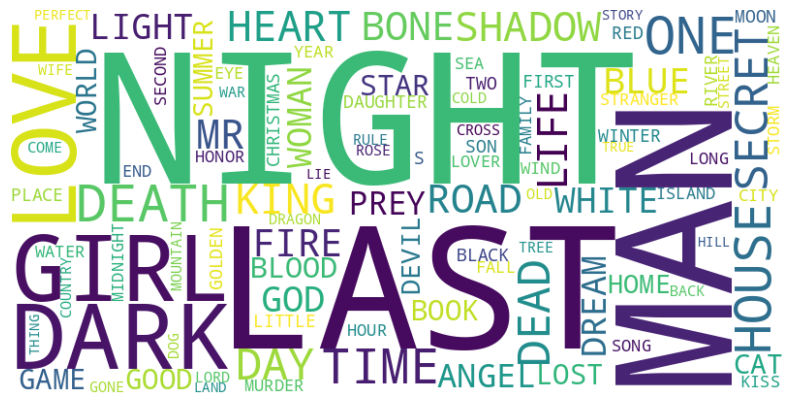

In [108]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Get unique book titles
book_titles = df['Title'].unique()

# Convert the unique book titles to a single string
text = ' '.join(book_titles)

# Create a WordCloud object with desired configurations
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the word cloud image to a file path
output_path = '/content/drive/MyDrive/dissertation/graphs/Most_common_words_in_titles.png' 
plt.savefig(output_path, dpi=300, bbox_inches='tight') 

plt.show()


# Heatmaps

In [109]:
import pandas as pd
import plotly.graph_objects as go

# Select the columns for analysis
columns = ['Action and Adventure', 'Animals', 'Art', 'Children', 'Contemporary', 'Crime', 'Death', 'Dystopian', 'Espionage', 'Family', 'Fantasy', 'Friendship', 'Health', 'Historical', 'Horror', 'Humor', 'Legal', 'Memoir', 'Murder', 'Mystery and Detective', 'Paranormal', 'Political', 'Psychological', 'Relationships', 'Romance', 'Self-help', 'Suspense', 'Thriller', 'Travel', 'War', 'Women']

# Create a DataFrame with the selected columns
df_selected = df[columns]
year_col = 'year'

# Group the data by genre and year and calculate the count of books
heatmap_data = df.groupby([year_col])[columns].sum()

# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='YlGnBu'))

# Set the axis labels and title
fig.update_layout(
    title='Genre Popularity Over Time',
    xaxis=dict(title='Genres'),
    yaxis=dict(title='Year'))

# Rotate the x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-90)

# Display the heatmap
fig.show()


In [110]:
plotly.offline.plot(fig, filename='/content/drive/MyDrive/dissertation/graphs/Genre_Popularity_Over_Time.html')

'/content/drive/MyDrive/dissertation/graphs/Genre_Popularity_Over_Time.html'

In [111]:
import pandas as pd
import plotly.graph_objects as go

# Select the columns for analysis
columns = ['Action and Adventure', 'Animals', 'Art', 'Children', 'Contemporary', 'Crime', 'Death', 'Dystopian', 'Espionage', 'Family', 'Fantasy', 'Friendship', 'Health', 'Historical', 'Horror', 'Humor', 'Legal', 'Memoir', 'Murder', 'Mystery and Detective', 'Paranormal', 'Political', 'Psychological', 'Relationships', 'Romance', 'Self-help', 'Suspense', 'Thriller', 'Travel', 'War', 'Women']

# Create a DataFrame with the selected columns
df_selected = df[columns]
year_col = 'year'

# Group the data by genre and year and calculate the count of books
heatmap_data = df.groupby([year_col])[columns].sum()

# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='Viridis'))  # Change colorscale to 'Viridis' for more variety

# Set the axis labels and title
fig.update_layout(
    title='Genre Popularity Over Time',
    xaxis=dict(title='Genres'),
    yaxis=dict(title='Year'))

# Rotate the x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-90)

# Display the heatmap
fig.show()


In [112]:
plotly.offline.plot(fig, filename='/content/drive/MyDrive/dissertation/graphs/Genre_Popularity_Over_Time_2.html')

'/content/drive/MyDrive/dissertation/graphs/Genre_Popularity_Over_Time_2.html'

# Network graph

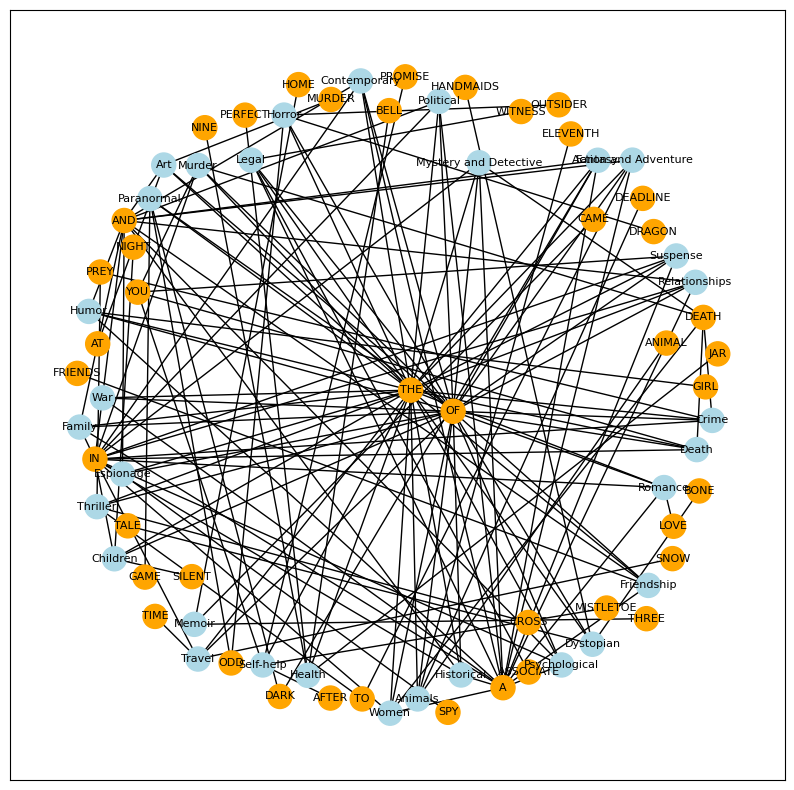

In [113]:
import networkx as nx
import matplotlib.pyplot as plt

genre_cols = [
    'Action and Adventure', 'Animals', 'Art', 'Children', 'Contemporary', 'Crime', 'Death', 'Dystopian', 'Espionage',
    'Family', 'Fantasy', 'Friendship', 'Health', 'Historical', 'Horror', 'Humor', 'Legal', 'Memoir', 'Murder',
    'Mystery and Detective', 'Paranormal', 'Political', 'Psychological', 'Relationships', 'Romance', 'Self-help',
    'Suspense', 'Thriller', 'Travel', 'War', 'Women'
]
title_col = 'Title'

# Create an empty graph
G = nx.Graph()

# Iterate over genre columns
for genre in genre_cols:
    # Get the top 5 most common words in titles for the current genre
    top_words = df.loc[df[genre] == 1, title_col].str.split().explode().value_counts().head(5)
    
    # Add genre node to the graph
    G.add_node(genre, color='lightblue')
    
    # Add word nodes to the graph
    for word, count in top_words.items():
        G.add_node(word, color='orange')
        G.add_edge(genre, word, weight=count)

# Create a layout for the graph with larger k value to prevent overlapping
pos = nx.spring_layout(G, k=10)

# Get node colors
node_colors = [data['color'] for _, data in G.nodes(data=True)]

# Adjust figure size to accommodate the larger layout
plt.figure(figsize=(10, 10))

# Draw the graph with node colors
nx.draw_networkx(G, pos, node_color=node_colors, with_labels=True, font_size=8)

# Save the graph to a file path
output_path = '/content/drive/MyDrive/dissertation/graphs/network_graph.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Adjust dpi and bbox_inches as needed

# Show the graph
plt.show()
